# __Quality Assesment Notebook for different mocks realizations__

To-do for this notebook:
    - compare redshift errors
    - compare quasar continuum
    - run 3D cross-correlation qso-LYa and LYa_1 x Lya_2

Conclusion:


In [1]:
import fitsio
import scipy as sp
import scipy.constants
import glob
import healpy
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import h5py
import os

import picca.constants
from picca import wedgize

#%matplotlib inline
#rcParams['figure.figsize'] = 10, 6
#rcParams['lines.linewidth'] = 4
#rcParams['axes.labelsize'] = 20
#rcParams['legend.fontsize'] = 20
#plt.rc('text',usetex=True)

Path to the mocks

In [2]:
mock = {}
mock['team'] = 'saclay'
mock['version'] = 'v4.4'

mock0 = {}
mock0['mock_ver'] = mock['version']+'/v4.4.0'
mock0['quick_ver'] = 'eboss-0.0'
mock0['mock_base'] = '/project/projectdirs/desi/mocks/lya_forest/'+mock['team']+'/'+mock0['mock_ver']+'/'
mock0['mock_quick'] = mock0['mock_base']+'/'+mock0['quick_ver']+'/'
mock0['picca'] = '/project/projectdirs/desi/mocks/lya_forest/picca/'+mock['team']+'/'+mock0['mock_ver']+'/'+mock0['quick_ver']+'/'

mock1 = {}
mock1['mock_ver'] = mock['version']+'/v4.4.0'
mock1['quick_ver'] = 'eboss-0.1-test'
mock1['mock_base'] = '/project/projectdirs/desi/mocks/lya_forest/'+mock['team']+'/'+mock1['mock_ver']+'/'
mock1['mock_quick'] = mock1['mock_base']+'/'+mock1['quick_ver']+'/'
mock1['picca'] = '/project/projectdirs/desi/mocks/lya_forest/picca/'+mock['team']+'/'+mock1['mock_ver']+'/'+mock1['quick_ver']+'/'

mockCorrelations = {}
mockCorrelations['areThereSomeCorrelations'] = '/project/projectdirs/desi/mocks/lya_forest/picca/'+mock['team']+'/'+mock['version']+'/global/areThereSomeCorrelations/'

# __Compare the catalogs__

In [3]:
# Catalogs
cat_path0 = {'master':mock0['mock_base']+'master.fits',
            'zcat':mock0['mock_base']+mock0['quick_ver']+'/zcat.fits',
            'desiDRQ':mock0['mock_base']+mock0['quick_ver']+'/zcat_desi_drq.fits',
            #'random':mock0['mock_base']+'/master_randoms.fits.gz'
            }
cat_path1 = {'master':mock1['mock_base']+'master.fits',
            'zcat':mock1['mock_base']+mock1['quick_ver']+'/zcat.fits',
            'desiDRQ':mock1['mock_base']+mock1['quick_ver']+'/zcat_desi_drq.fits',
            #'random':mock1['mock_base']+'/master_randoms.fits.gz'
            }

redshift_key = {'master':'Z_QSO_RSD', 'zcat':'Z', 'desiDRQ':'Z','random':'Z'}

master 2327127 2327127 True


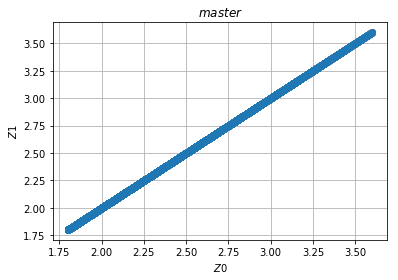

zcat 257441 257441 True


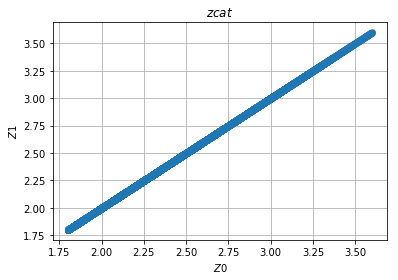

desiDRQ 257441 257441 True


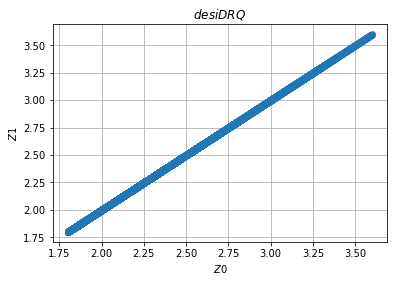

master 2327127 2327127 True


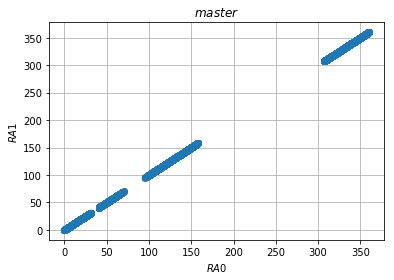

zcat 257441 257441 True


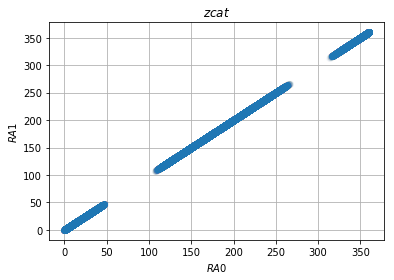

desiDRQ 257441 257441 True


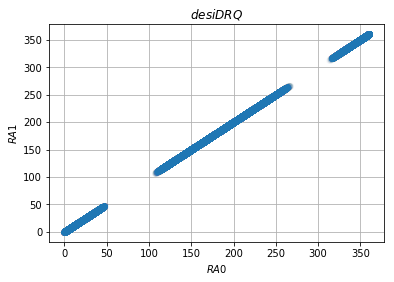

master 2327127 2327127 True


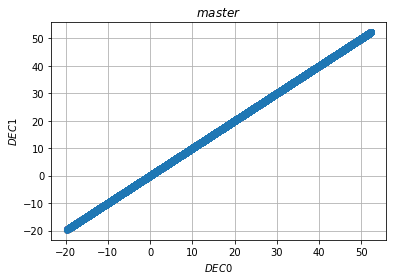

zcat 257441 257441 True


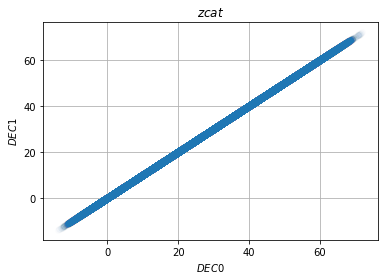

desiDRQ 257441 257441 True


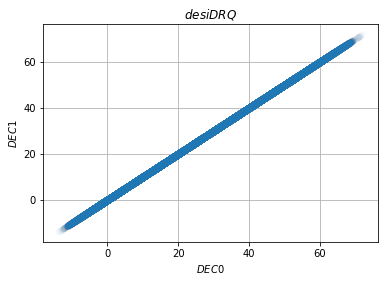

In [4]:
for el in ['Z','RA','DEC']:
    for name in cat_path0.keys():
        h0 = fitsio.FITS(cat_path0[name])
        if el=='Z':
            yyy0 = h0[1][redshift_key[name]][:]
        else:
            yyy0 = h0[1][el][:]
        h0.close()

        h1 = fitsio.FITS(cat_path1[name])
        if el=='Z':
            yyy1 = h1[1][redshift_key[name]][:]
        else:
            yyy1 = h1[1][el][:]
        h1.close()

        print(name, yyy0.size, yyy1.size, yyy0.size==yyy1.size)
        minNb = min(1000000,min(yyy0.size, yyy1.size))
    
        plt.errorbar(yyy0[:minNb], yyy1[:minNb], fmt='o', alpha=0.01)
        plt.xlabel(r'$'+el+'0$')
        plt.ylabel(r'$'+el+'1$')
        plt.title(r'$'+name+'$')
        plt.grid()
        plt.show()

# __Compare the true catalogs__

In [5]:
cat0 = {}
h = fitsio.FITS(mock0['mock_quick']+'/zcat_TRUTH.fits')
for k in ['TARGETID','SEED','Z','MAG','FLUX_G','FLUX_R','FLUX_Z','FLUX_W1','FLUX_W2','TRUEZ','Z_INPUT','DZ_FOG','DZ_SYS','Z_NORSD']:
    cat0[k] = h[1][k][:]
h.close()

cat1 = {}
h = fitsio.FITS(mock1['mock_quick']+'/zcat_TRUTH.fits')
for k in ['TARGETID','SEED','Z','MAG','FLUX_G','FLUX_R','FLUX_Z','FLUX_W1','FLUX_W2','TRUEZ','Z_INPUT','DZ_FOG','DZ_SYS','Z_NORSD']:
    cat1[k] = h[1][k][:]
h.close()

for k in cat0.keys():
    print(k)
    if k=='SEED':
        print(len(set(cat0[k])))
        print(len(set(cat1[k])))
        print(sp.in1d(cat0[k],cat1[k]).sum())
        print(sp.in1d(cat1[k],cat0[k]).sum())
    minSize = min(cat0[k].size,cat1[k].size)
    plt.errorbar(cat0[k][:minSize],cat1[k][:minSize],fmt='o',alpha=0.01)
    plt.title(k)
    plt.grid()
    plt.show()

OSError: FITSIO status = 104: could not open the named file
failed to find or open the following file: (ffopen)
/project/projectdirs/desi/mocks/lya_forest/saclay/v4.4/v4.4.0//eboss-0.1-test//z
cat_TRUTH.fits


In [ ]:
cat0 = {}
h = fitsio.FITS(mock0['mock_quick']+'/zcat_QSO_META.fits')
for k in ['TARGETID','MABS_1450','SLOPES','EMLINES','BAL_TEMPLATEID']:
    cat0[k] = h[1][k][:]
h.close()

cat1 = {}
h = fitsio.FITS(mock1['mock_quick']+'/zcat_QSO_META.fits')
for k in ['TARGETID','MABS_1450','SLOPES','EMLINES','BAL_TEMPLATEID']:
    cat1[k] = h[1][k][:]
h.close()

for k in cat0.keys():
    print(k)
    minSize = min(cat0[k].size,cat1[k].size)
    if k=='EMLINES':
        print(cat0[k].min())
        plt.errorbar(sp.log10(cat0[k][:minSize]),sp.log10(cat1[k][:minSize]),fmt='o',alpha=0.01)
    else:
        plt.errorbar(cat0[k][:minSize],cat1[k][:minSize],fmt='o',alpha=0.01)
    plt.title(k)
    plt.grid()
    plt.show()

# __Compare the magnitudes__

In [6]:
name_mag = {}
name_mag['G'] = 'g mag: decam'
name_mag['R'] = 'r mag: decam'
name_mag['Z'] = 'z mag: decam'

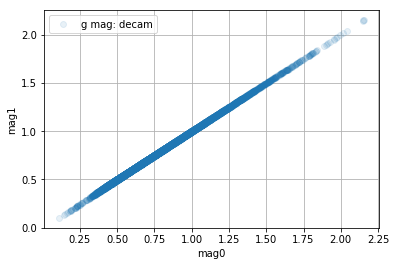

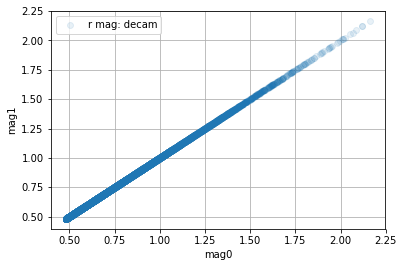

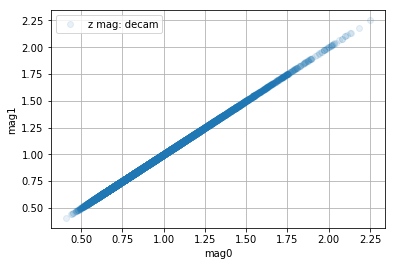

In [7]:
for b,n in name_mag.items():
    h0 = fitsio.FITS(cat_path0['zcat'])
    mag0 = h0['ZCATALOG']['FLUX_'+b][:]
    h0.close()
    
    h1 = fitsio.FITS(cat_path1['zcat'])
    mag1 = h1['ZCATALOG']['FLUX_'+b][:]
    h1.close()

    minNb = min(10000,min(mag0.size, mag1.size))
    
    plt.errorbar(sp.log10(mag0[:minNb]),sp.log10(mag1[:minNb]),fmt='o',alpha=0.1,label=n)
    plt.xlabel(r'mag0')
    plt.ylabel(r'mag1')
    plt.legend()
    plt.grid()
    plt.show()

# __Compare the Lya transmission__

(2047, 6292) (2047, 6292)


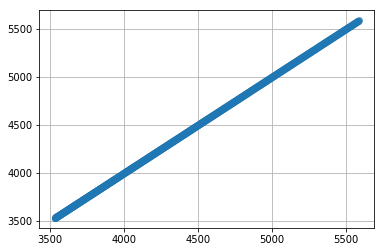

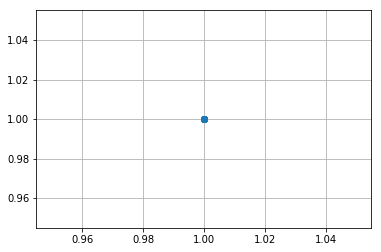

In [8]:
for i in range(1):
    f0 = mock0['mock_base']+'/'+str(i)+'/'+str(i)+'/transmission-16-'+str(i)+'.fits'
    h0 = fitsio.FITS(f0)
    z0 = h0['METADATA']['Z'][:]
    lObs0 = h0['WAVELENGTH'].read()
    trans0 = h0['TRANSMISSION'].read()
    h0.close()

    f1 = mock1['mock_base']+'/'+str(i)+'/'+str(i)+'/transmission-16-'+str(i)+'.fits'
    h1 = fitsio.FITS(f1)
    z1 = h1['METADATA']['Z'][:]
    lObs1 = h1['WAVELENGTH'].read()
    trans1 = h1['TRANSMISSION'].read()
    h1.close()
    
    print(trans0.shape, trans1.shape)
    
    plt.errorbar(lObs0,lObs1,fmt='o',alpha=0.1)
    plt.grid()
    plt.show()
    
    plt.errorbar(trans0.flatten()[:1000],trans1.flatten()[:1000],fmt='o',alpha=0.1)
    plt.grid()
    plt.show()

# __Compare the flux__

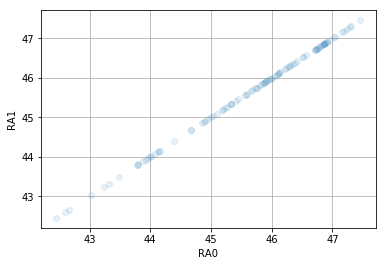

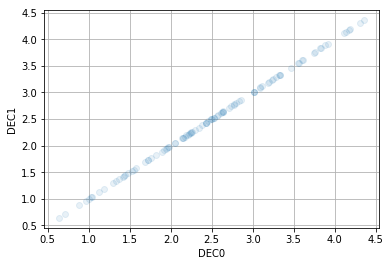

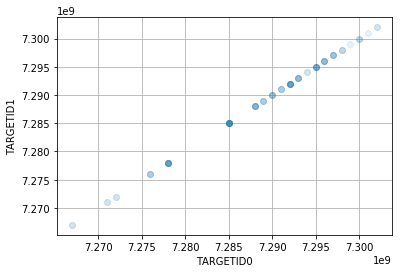

(2380,)
(2380,)


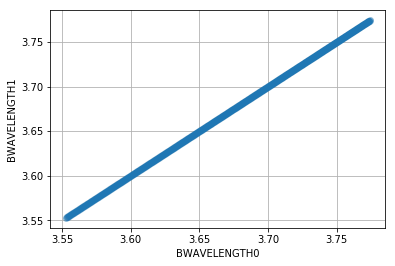

(215, 2380)
(215, 2380)


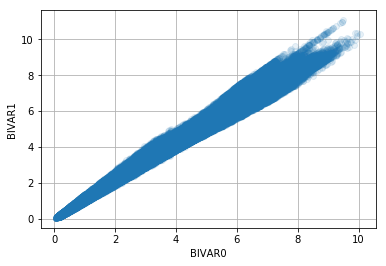

(215, 2380)
(215, 2380)


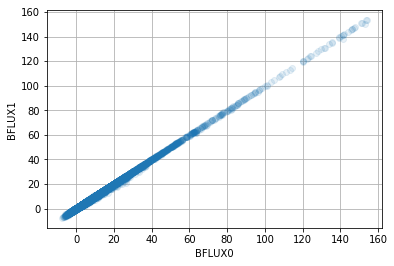

(2116,)
(2116,)


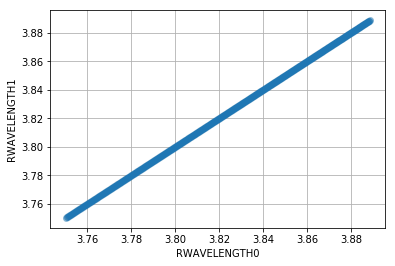

(215, 2116)
(215, 2116)


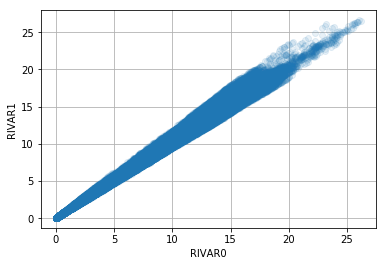

(215, 2116)
(215, 2116)


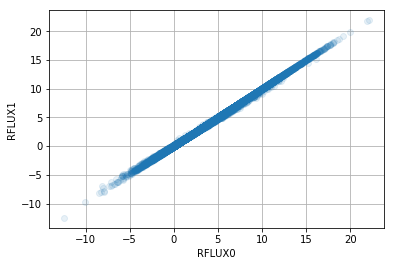

(2399,)
(2399,)


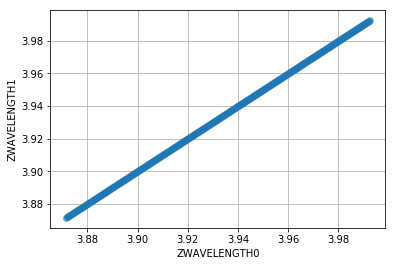

(215, 2399)
(215, 2399)


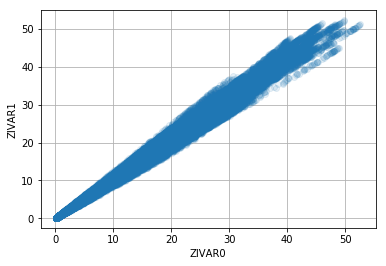

(215, 2399)
(215, 2399)


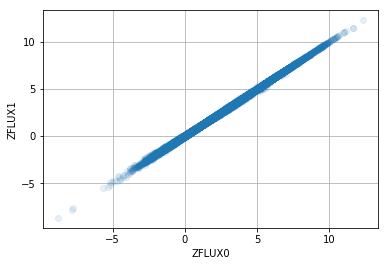

In [9]:
flux = {'Mock0':{}, 'Mock1':{}}
flux['Mock0']['PATH'] = mock0['mock_base']+mock0['quick_ver']+'/spectra-16/0/0/spectra-16-0.fits'
flux['Mock1']['PATH'] = mock1['mock_base']+mock1['quick_ver']+'/spectra-16/0/0/spectra-16-0.fits'

for el in flux.keys():
    h = fitsio.FITS(flux[el]['PATH'])
    flux[el]['RA'] = h['FIBERMAP']['TARGET_RA'][:]
    flux[el]['DEC'] = h['FIBERMAP']['TARGET_DEC'][:]
    flux[el]['TARGETID'] = h['FIBERMAP']['TARGETID'][:]
    for ell in ['B','R','Z']:
        flux[el][ell+'_WAVELENGTH'] = sp.log10(h[ell+'_WAVELENGTH'].read())
        flux[el][ell+'_IVAR'] = h[ell+'_IVAR'].read()*(h[ell+'_MASK'].read()==0)
        flux[el][ell+'_FLUX'] = h[ell+'_FLUX'].read()
    h.close()

for el in ['RA','DEC','TARGETID']:
    plt.errorbar(flux['Mock0'][el][:100],flux['Mock1'][el][:100],fmt='o',alpha=0.1)
    plt.xlabel(el+'0') 
    plt.ylabel(el+'1') 
    plt.grid()
    plt.show()

for el in ['B','R','Z']:
    for ell in ['_WAVELENGTH','_IVAR','_FLUX']:
        print(flux['Mock0'][el+ell].shape)
        print(flux['Mock1'][el+ell].shape)
        if len(flux['Mock0'][el+ell].shape)==2:
            plt.errorbar(flux['Mock0'][el+ell][:100,:],flux['Mock1'][el+ell][:100,:],fmt='o',alpha=0.1)
        else:
            plt.errorbar(flux['Mock0'][el+ell],flux['Mock1'][el+ell],fmt='o',alpha=0.1)
        plt.xlabel( (el+ell+'_0').replace('_','') ) 
        plt.ylabel( (el+ell+'_1').replace('_','') ) 
        plt.grid()
        plt.show()

# __Compare one spectrum__

/project/projectdirs/desi/mocks/lya_forest/saclay/v4.4/v4.4.0/eboss-0.0/spectra-16/0/0/spectra-16-0.fits
/project/projectdirs/desi/mocks/lya_forest/saclay/v4.4/v4.4.0/eboss-0.1-test/spectra-16/0/0/spectra-16-0.fits
0
0
0
2.4272227


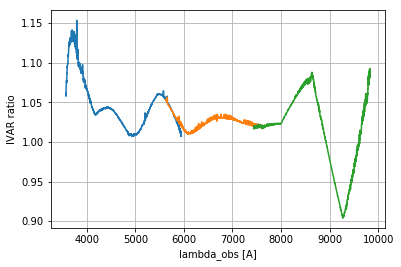

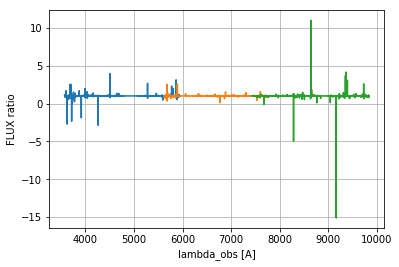

2.8095593


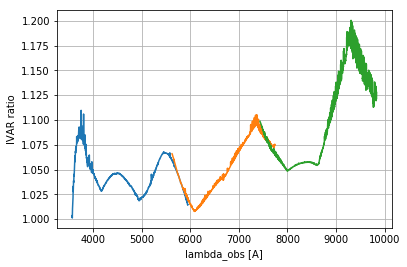

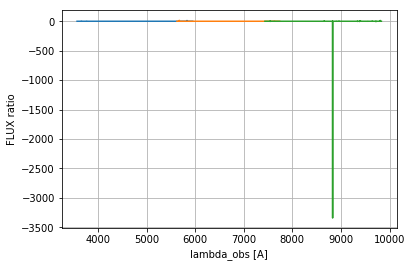

2.7025526


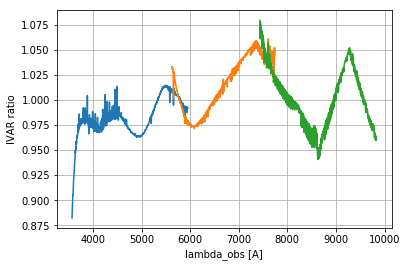

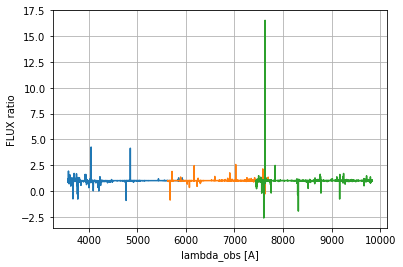

5.5261416


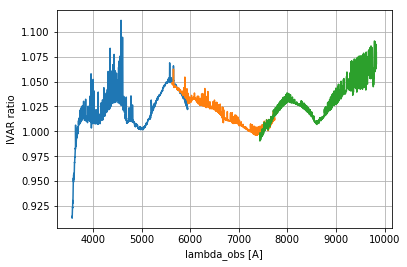

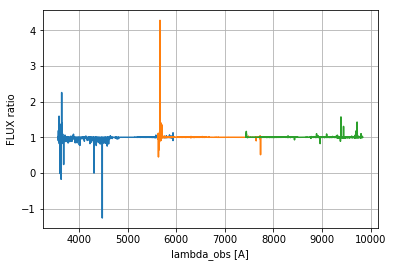

3.2401881


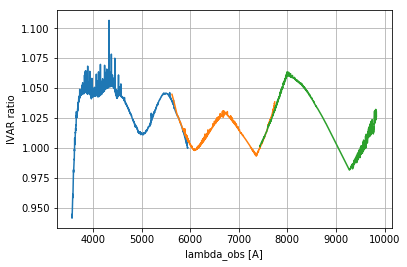

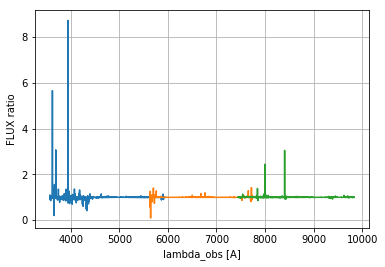

2.1204867


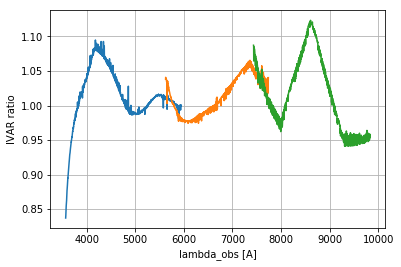

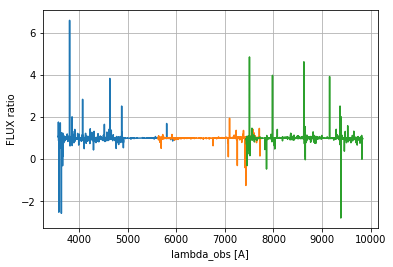

2.652868


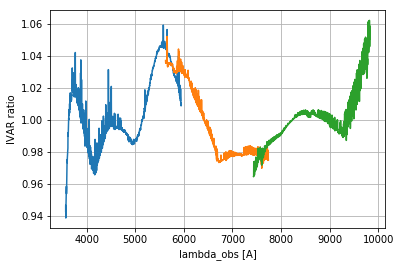

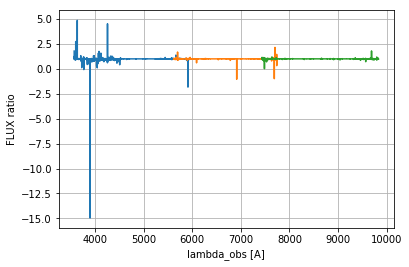

5.3114276


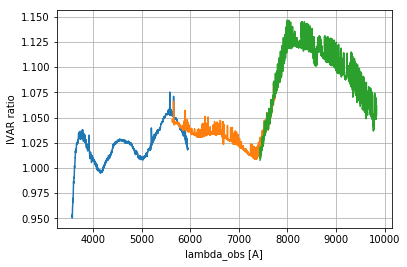

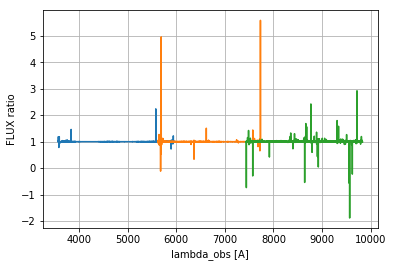

3.1507018


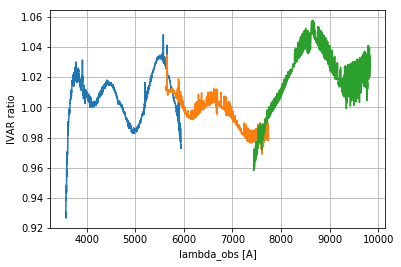

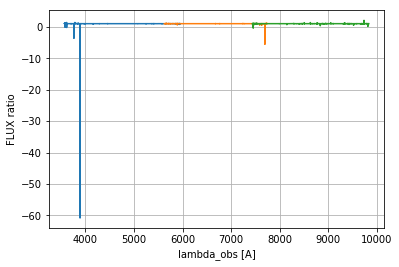

3.7056215


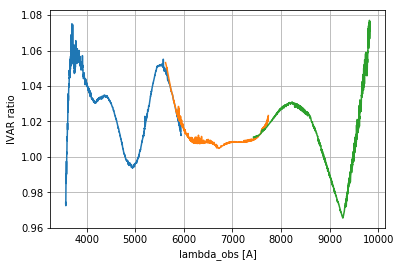

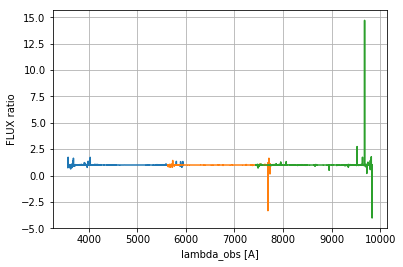

In [10]:
flux = {'Mock0':{}, 'Mock1':{}}
flux['Mock0']['PATH'] = mock0['mock_base']+mock0['quick_ver']+'/spectra-16/0/0/spectra-16-0.fits'
flux['Mock1']['PATH'] = mock1['mock_base']+mock1['quick_ver']+'/spectra-16/0/0/spectra-16-0.fits'
raw = '/project/projectdirs/desi/mocks/lya_forest/london/v6.0/'
#flux['Mock1']['PATH'] = raw+'v6.0.9/eboss-0.0/test-0.0/spectra-16_with_DLA_real0/0/0/spectra-16-0.fits'
#flux['Mock1']['PATH'] = raw+'v6.0.9/eboss-0.0/test-0.0/spectra-16_real1/0/0/spectra-16-0.fits'

for el in flux.keys():
    print(flux[el]['PATH'])
    h = fitsio.FITS(flux[el]['PATH'])
    flux[el]['RA'] = h['FIBERMAP']['TARGET_RA'][:]
    flux[el]['DEC'] = h['FIBERMAP']['TARGET_DEC'][:]
    flux[el]['TARGETID'] = h['FIBERMAP']['TARGETID'][:]
    for ell in ['B','R','Z']:
        flux[el][ell+'_WAVELENGTH'] = h[ell+'_WAVELENGTH'].read()
        flux[el][ell+'_IVAR'] = h[ell+'_IVAR'].read()*(h[ell+'_MASK'].read()==0)
        flux[el][ell+'_FLUX'] = h[ell+'_FLUX'].read()
    h.close()

    
print( ((flux['Mock1']['B_WAVELENGTH']-flux['Mock0']['B_WAVELENGTH'])!=0.).sum() ) 
print( ((flux['Mock1']['R_WAVELENGTH']-flux['Mock0']['R_WAVELENGTH'])!=0.).sum() )
print( ((flux['Mock1']['Z_WAVELENGTH']-flux['Mock0']['Z_WAVELENGTH'])!=0.).sum() )

for i in range(10):
    
    snr = (flux['Mock1']['B_FLUX'][i]*sp.sqrt(flux['Mock1']['B_IVAR'][i])).mean()
    if snr<2.:
        continue
    print(snr)
    
    for ell in ['_IVAR','_FLUX']:
        for el in ['B','R','Z']:
            #plt.plot(flux['Mock1'][el+'_WAVELENGTH'],flux['Mock0'][el+ell][i])
            #plt.plot(flux['Mock1'][el+'_WAVELENGTH'],flux['Mock1'][el+ell][i])
            plt.plot(flux['Mock1'][el+'_WAVELENGTH'],flux['Mock1'][el+ell][i]/flux['Mock0'][el+ell][i])
        plt.xlabel( 'lambda_obs [A]' ) 
        plt.ylabel( (ell).replace('_','')+' ratio' ) 
        plt.grid()
        plt.show()

## __Compare delta field__

In [11]:
#delta0 = fitsio.FITS(mock0['picca']+'/deltas/delta-100.fits.gz')
#delta1 = fitsio.FITS(mock1['picca']+'/deltas/delta-100.fits.gz')
delta0 = fitsio.FITS(mock0['picca']+'/deltas/delta-100.fits.gz')
delta1 = fitsio.FITS(mock1['picca']+'/deltas/delta-100.fits.gz')

OSError: FITSIO status = 104: could not open the named file
failed to find or open the following file: (ffopen)
/project/projectdirs/desi/mocks/lya_forest/picca/saclay/v4.4/v4.4.0/eboss-0.0//d
eltas/delta-100.fits.gz


In [ ]:
### Attributes
for k in ['RA','DEC','Z','PLATE','MJD','FIBERID','THING_ID']:
    xxx = []
    yyy = []
    for i in range(1,100):
        mockid = delta0[i].read_header()['EXTNAME']
        try:
            kv0 = delta0[mockid].read_header()[k]
            kv1 = delta1[mockid].read_header()[k]
        except:
            continue
        xxx += [kv0]
        yyy += [kv1]
    xxx = sp.array(xxx)
    yyy = sp.array(yyy)
    plt.errorbar(xxx,yyy,fmt='o')
    plt.xlabel(r'$'+k+'0$')
    plt.ylabel(r'$'+k+'1$')
    plt.grid()
    plt.show()

In [ ]:
### Values
for k in ['DELTA','WEIGHT','CONT']:
    xmin = 1.e6
    ymin = 1.e6
    xmax = -1.e6
    ymax = -1e6
    xxx = []
    yyy = []
    for i in range(1,1000):
        mockid = delta0[i].read_header()['EXTNAME']
        try:
            kv0 = delta0[mockid][k][:]
            kv1 = delta1[mockid][k][:]
        except:
            continue
        w0 = sp.in1d(delta0[mockid]['LOGLAM'][:],delta1[mockid]['LOGLAM'][:])
        w1 = sp.in1d(delta1[mockid]['LOGLAM'][:],delta0[mockid]['LOGLAM'][:])
        if w0.sum()==0: continue
        plt.errorbar(kv0[w0],kv1[w1],fmt='o',alpha=0.1,color='blue')
        xmin = min(xmin,kv0[w0].min())
        xmax = max(xmax,kv0[w0].max())
        ymin = min(ymin,kv1[w1].min())
        ymax = max(ymax,kv1[w1].max())
    plt.plot([xmin,xmax],[ymin,ymax],color='black')
    plt.xlabel(r'$'+k+'0$')
    plt.ylabel(r'$'+k+'1$')
    plt.grid()
    plt.show()

# __Compare the output of picca_delta__

In [ ]:
### List of all the delta attributes functions to plot
all_delta_attributes = {'Mock0':mock0['picca']+'/iter.fits.gz', 'Mock1':mock1['picca']+'/iter.fits.gz'}

### Flux stack vs. observed wavelength

In [ ]:
for name,path in sorted(all_delta_attributes.items()):
    h = fitsio.FITS(path)
    loglam = h[1]['LOGLAM'][:]
    stack  = h[1]['STACK'][:]
    w = h[1]['WEIGHT'][:]>0.
    loglam = loglam[w]
    stack  = stack[w]
    plt.plot(10.**loglam, stack, linewidth=4,marker='o',label=name)
    h.close()
plt.xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\mathrm{\AA{}}]$')
plt.ylabel(r'$\mathrm{\overline{Flux}}$')
plt.legend()
plt.grid()
plt.show()

### Mean continuum

In [ ]:
for name,path in sorted(all_delta_attributes.items()):
    h = fitsio.FITS(path)
    loglam_rest = h[3]['LOGLAM_REST'][:]
    mean_cont = h[3]['MEAN_CONT'][:]
    w = h[3]['WEIGHT'][:]>0.
    loglam_rest = loglam_rest[w]
    mean_cont = mean_cont[w]
    plt.plot(10.**loglam_rest/10., mean_cont, linewidth=4,marker='o',label=name)
    h.close()
plt.xlabel(r'$\lambda_{\mathrm{R.F.}} \, [\mathrm{nm}]$')
plt.ylabel(r'$\mathrm{\overline{Flux}}$')
plt.legend()
plt.grid()
plt.show()

### Correction to the pipeline variance

In [ ]:
for name,path in sorted(all_delta_attributes.items()):
    h = fitsio.FITS(path)
    loglam = h[2]['LOGLAM'][:]
    eta = h[2]['ETA'][:]
    w = h[2]['NB_PIXELS'][:]>0.
    loglam = loglam[w]
    eta = eta[w]
    plt.errorbar(10.**loglam, eta, linewidth=4,label=name)
    h.close()
plt.xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\mathrm{\AA{}}]$')
plt.ylabel(r'$\eta$')
plt.legend()
plt.grid()
plt.show()

### Large Scale Structure variance

In [ ]:
for name,path in sorted(all_delta_attributes.items()):
    h = fitsio.FITS(path)
    loglam = h[2]['LOGLAM'][:]
    var_lss = h[2]['VAR_LSS'][:]
    w = h[2]['NB_PIXELS'][:]>0.
    loglam = loglam[w]
    var_lss = var_lss[w]
    plt.errorbar(10.**loglam/10., var_lss, linewidth=4,label=name)
    h.close()
plt.xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\mathrm{nm}]$')
plt.ylabel(r'$\sigma^{2}_{\mathrm{LSS}}$')
plt.legend()
plt.grid()
plt.show()

### Let's look at the contribution of the variation of the continuum

In [ ]:
for name,path in sorted(all_delta_attributes.items()):
    h = fitsio.FITS(path)
    loglam = h[2]['LOGLAM'][:]
    fudge = h[2]['FUDGE'][:]
    w = h[2]['NB_PIXELS'][:]>0
    loglam = loglam[w]
    fudge = fudge[w]
    plt.errorbar(10.**loglam, fudge, linewidth=4,label=name)
    h.close()
plt.xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\mathrm{\AA{}}]$')
plt.ylabel(r'$\mathrm{Fudge}$')
plt.legend()
plt.grid()
plt.show()

# __Compute 1d cross-correlation__

To compute the cross-correlation between Lya forest from a mock to the Lya forest of another mock,
simply copy the following command in your terminal

In [ ]:
cmd = 'picca_cf1d.py'
cmd += ' --in-dir '+mock0['picca']+'/deltas/'
cmd += ' --in-dir2 '+mock1['picca']+'/deltas/'
cmd += ' --out ' +mockCorrelations['areThereSomeCorrelations']+'/cf1d_cross.fits.gz'
cmd += ' --nside 8'
print(cmd)

Let's plot it

In [ ]:
### List of all the correlation to plot
all_cf1d = {'mock0':mock0['picca']+'/cf1d_z_0_10.fits.gz',
            'mock1':mock0['picca']+'/cf1d_z_0_10.fits.gz',
            #'Cross':mockCorrelations['areThereSomeCorrelations']+'/cf1d_cross.fits.gz'
           }

In [ ]:
### The variance
for name,path in all_cf1d.items():
    try:
        h = fitsio.FITS(path)
    except:
        print('Couldnt find file {}, skipping'.format(path))
        continue
    head = h[1].read_header() #- in the future replace '1' by '1DCOR'
    llmin = head['LLMIN']
    llmax = head['LLMAX']
    dll = head['DLL']
    n1d = int((llmax-llmin)/dll+1)
    x = sp.arange(0.,n1d)*dll+llmin
    y = h[1]['v1d'][:]
    w = h[1]['wv1d'][:]>0.
    x = x[w]
    y = y[w]
    plt.plot(10.**x,y,linewidth=4,label=name)
    h.close()
plt.xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA] $')
plt.ylabel(r'$\xi^{ff,1D}$')
plt.legend()
plt.grid()
plt.show()

In [ ]:
### The normalized correlation
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,14))

### all
for name,path in all_cf1d.items():
    try:
        h = fitsio.FITS(path)
    except:
        print('cant find {}, skipping'.format(path))
        continue
    y = h[1]['c1d'][:] #- in the future replace '1' by '1DCOR'
    binsize = dll
    bins = sp.arange(y.size)
    x = sp.power(10,bins*binsize)
    w = h[1]['nc1d'][:]>0.
    x = x[w]
    y = y[w]
    ax1.errorbar(x,y,marker='o',linewidth=4,label=name)
    h.close()
ax1.set_xlabel(r'$\lambda_{1}/\lambda_{2}$')
ax1.set_ylabel(r'$\xi^{ff,1D}_{normed}(1,2)$')
ax1.legend()
ax1.grid()

### zoom
ymin = 1.e6
ymax = -1.e6
for name,path in all_cf1d.items():
    try:
        h = fitsio.FITS(path)
    except:
        print("Can't find file {}, skipping".format(path))
        continue
    y = h[1]['c1d'][:] #- in the future replace '1' by '1DCOR'
    binsize = dll
    bins = sp.arange(y.size)
    x = sp.power(10,bins*binsize)
    w = h[1]['nc1d'][:]>0.
    x = x[w]
    y = y[w]
    ymin = min(ymin,y.min())
    ymax = max(ymax,y[y!=1.].max())
    ax2.errorbar(x,y,marker='o',linewidth=4,label=name)
    h.close()
ax2.set_xlim([0.999,1.05])
ax2.set_ylim([ymin-0.05,ymax+0.05])
ax2.set_xlabel(r'$\lambda_{1}/\lambda_{2}$')
ax2.set_ylabel(r'$\xi^{ff,1D}_{normed}(1,2)$')
ax2.legend()
ax2.grid()

plt.subplots_adjust(hspace=0.4)
plt.show()

# __Cross covariance of the 3D correlations__

In [ ]:
zint = ['0:2.35','2.35:2.65','2.65:3.05','3.05:10','0:10']

One of the way to look for correlations is to look at the cross-covariance between
different measured 3D correlations in mocks,
simply run the following command into the terminal

In [ ]:
for zinterval in zint:
    zmin = zinterval.split(':')[0]
    zmax = zinterval.split(':')[1]

    cmd = 'picca_export_cross_covariance.py'
    cmd += ' --data1 '+mock0['picca']+'/xcf_z_{}_{}.fits'.format(zmin,zmax)
    cmd += ' --data2 '+mock1['picca']+'/xcf_z_{}_{}.fits'.format(zmin,zmax)
    cmd += ' --out '+mockCorrelations['areThereSomeCorrelations']+'/cross_covar_xcf_z_{}_{}.fits'.format(zmin,zmax)
    print(cmd)
    print()

Let's look at the matrix

In [ ]:
zmin = zint[3].split(':')[0]
zmax = zint[3].split(':')[1]
h = fitsio.FITS(mockCorrelations['areThereSomeCorrelations']+'/cross_covar_xcf_z_{}_{}.fits'.format(zmin,zmax))
co = h['COVAR']['CO'][:]
cor = h['COVAR']['COR'][:]

In [ ]:
plt.imshow(co, interpolation='nearest', origin='lower', aspect='auto')
cbar = plt.colorbar()
cbar.set_label(r'$CO$',size=20)
cbar.update_ticks()
plt.xlabel(r'$bin0$')
plt.ylabel(r'$bin1$')
plt.grid()
plt.show()

In [ ]:
plt.imshow(cor, interpolation='nearest', origin='lower', aspect='auto')
cbar = plt.colorbar()
cbar.set_label(r'$CO$',size=20)
cbar.update_ticks()
plt.xlabel(r'$bin0$')
plt.ylabel(r'$bin1$')
plt.grid()
plt.show()

In [ ]:
### Variance
plt.plot(sp.diag(co),linewidth=4)
plt.xlabel(r'$bin0 x bin1$')
plt.ylabel(r'$CAA$')
plt.grid()
plt.show()

In [ ]:
### The cross-correlation
ymin = 1.
ymax = -1.
for j in range(2):
    c = cor.copy()
    a = sp.array( [ sp.mean(sp.diagonal(c, offset=(50*i+j))) for i in range(2500//50) ])
    label = '\mathrm{Auto: \, \Delta r_{\perp} = '+str(int(4*j))+'\,h^{-1}\, \mathrm{Mpc}}'
    plt.plot(4*sp.arange(2500//50),a,linewidth=4,marker='o',markersize=8, label=r'$'+label+'$')
    ymin = min(ymin,a.min())
    ymax = max(ymax,a[a!=1.].max())
plt.xlabel(r'$\Delta r_{\parallel} \, [h^{-1}\, \mathrm{Mpc}]$')
plt.ylabel(r'$Corr_{AB}$')
plt.xlim([-1.,100.])
plt.ylim([ymin-0.01,ymax+0.01])
plt.legend()
plt.grid()
plt.show()